<h1 align = 'center'> Measuring Galaxy Distance Using Spectra Data </h1>
<h4 align = 'center'>Computational Astronomy Series, Episode 1 </h4> 

<p align = 'center'> Author: K M Shariat Ullah <br> Student, Dept. of Electrical and Electronic Engineering, <br> Shahjalal University of Science and Technology, Sylhet, <br> E-mail: cast.shariat@gmail.com</p>

#### Catalog

We can see many twinkling objects in the night sky. But all of these objects aren't stars. Only if we have enough dark place for observation and a light pollutionless sky, we can see nebulas too. Some of these bright looking objects are comets or can be perhaps asteroid. In 1771, french astronomer Charles Messier catalogued 103 objects in the night sky that look diffused but are not comets. At that time we didn't know that galaxies exist other than our own galaxy, the Milkyway. Messier confused these diffused objects as nebulas. This catalogue is called the Messier catalogue with 103 objects. The objects have id with initials `M`. For example `M 45` means the 45th object in the Messier Catalogue. After that many catalogues with more objects and more information were made. For example we have the New General Catalogue of galaxies and cluster of stars. The objects in this catalogue have id with initials `NGC`. In this notebook we will be working with `NGC 1068`, a galaxy at 14.4 Mpc distance from us.  

#### Hubble's Universe

Previously we used to think that the universe is static. But then Edwin Hubble comes and with his brilliant observation shows that the universe is not static. Instead the universe is expanding. He saw that the galaxies around us were going away from us. The more distant the galaxy, the more fast it was going away from us. Thus came Hubble's famous formula

$$v = H_0 d \tag{1}$$

where $v$ is the velocity of the moving galaxy, $d$ is the distance of the galaxy from the observer and $H_0$ is the Hubble's constant which is almost equal to $72  \text{(km/s)/MPc}$ 


#### Spectroscopy

But how did Hubble knew that the galaxy that he was looking were all moving? The answer is he saw Doppler effect in the spectra of those galaxies. We know that light comes from an object to the observer in a continuous spectrum namely the optical spectrum (VIBGYOR). But if this light passes through some object (say a moleculer cloud of Hydrogen) some certain part of the spectrum will be absorved and make black lines. These lines are called absorption lines. If a luminous object is emitting light and the light passes through a molecular cloud made of Hydrogen then we will see these black absorption lines at wavelenght $ \lambda_{H\alpha} = 6562.8 {\AA} $ and $ \lambda_{H\beta} = 4861  {\AA} $

<figure>
    <img src = 'AbsorptionSpectrum.jpg' align = 'center' width = 90%> 
    <figcaption>When light passes through a molecular cloud, some of it's spectrum is absorbed by the cloud at different wavelengths and thus black lines are created. Credit: NASA, ESA, and L. Hustak (STScI).</figcaption>
</figure>

But when Edwin Hubble saw these galaxies which by the way were abundant with Atomic Hydrogens, did not have these black lines at $6562.8 {\AA}$ and $4861  {\AA}$, instead these two lines were little bit shifted to the right. Hubble stated from this observation that these wavelenghts are `Red Shifted` and that can only be possible if and only if the objects are moving away from us. This comes from the principle of the Doppler Effect. 

Using Doppler effect, we have the Red shift quantity 

$$z = \frac{v}{c} \tag{2}$$

where $v$ is the velocity of the object and $c$ is light's velocity. If the galaxy's velocity is $60%$ or more than the speed of light, then we have to use the relativistic formula as below:

$$z = \sqrt{\frac{1+v/c}{1-v/c}} -1 \tag{3}$$

To determine the Redshift value we have the following formula:

$$ z = \frac{\lambda_{\text{obs}}-\lambda_{\text{src}}}{\lambda_{\text{src}}}$$

where $\lambda_{\text{obs}}$ is the wavelength at which we are observing the absorption line and $\lambda_{\text{src}}$ is the wavelenght at which the absorption line should be. 

#### Calculating NGC 1068's Distance

We will calculate NGC 1068's distance using it's spectra. To get the object's spectra we will go to <a href = 'https://ned.ipac.caltech.edu/'>NASA/IPAC Extragalactic Database</a> and search NGC 1068 in the search bar. After a moment, you'll see an interface shown as below. Click the `Spectra` tab and you'll have some datasets for spectra. We will need to select a suitable dataset of spectra for our work. As we will be working using the Hydrogen Alpha line ($6562.8 {\AA}$) it's wavelenght must be in the range of the spectra. You can check the range of each dataset in the information box (Red Box with Label From: and To:). After choosing the suitable dataset for your work click on the `NED-ASCII` link. It will open/download the database in txt format. Open and excel file and import the data of that text file and clean the dataset. We will be only working with `Published-Value` and `Spectral-axis` and `Intensity` data. Remove every other info and save the file as a csv file.

<figure>
    <img src = 'SpectraInfo.png' width = 90%>
    <figcaption>NASA/IPAC Extragalactic Database have a large number of observation of spectra for different objects</figcaption>
</figure>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

We have saved the cleaned spectral data as `data.csv`. As the $H\alpha$ line will be between 6500 and 7000 we can slice the whole spectrum and work with only that portion.

In [6]:
data = pd.read_csv('data.csv')  # NGC 1068 Data
x = data.wavelength[1000:1190]  # slicing
y = data.Intensity[1000:1190]   # slicing

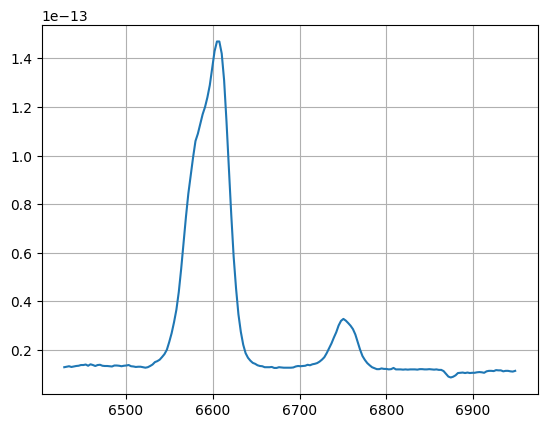

In [7]:
plt.plot(x,y)                   # plotting
plt.grid()                      
plt.show()

The python package `Scipy` has a `find_peaks` function. If you input a dataset in the function, it will return all the peak's indices. We will input our spectrum's dataset in the function and find at which index does the $H\alpha$ line lies.

In [9]:
peak = find_peaks(y)                

for i in range(len(peak[0])):
    print(f"x: {x[1000+peak[0][i]]} --> y: {y[1000+peak[0][i]]}")

x: 6434.34 --> y: 1.32e-14
x: 6453.59 --> y: 1.39e-14
x: 6459.09 --> y: 1.4e-14
x: 6470.09 --> y: 1.38e-14
x: 6486.59 --> y: 1.35e-14
x: 6503.09 --> y: 1.37e-14
x: 6514.09 --> y: 1.3e-14
x: 6604.84 --> y: 1.47e-13
x: 6668.09 --> y: 1.29e-14
x: 6676.34 --> y: 1.28e-14
x: 6698.34 --> y: 1.33e-14
x: 6709.34 --> y: 1.38e-14
x: 6750.59 --> y: 3.27e-14
x: 6794.59 --> y: 1.23e-14
x: 6808.34 --> y: 1.25e-14
x: 6822.09 --> y: 1.19e-14
x: 6830.34 --> y: 1.19e-14
x: 6838.59 --> y: 1.2e-14
x: 6849.59 --> y: 1.2e-14
x: 6857.84 --> y: 1.19e-14
x: 6888.09 --> y: 1.06e-14
x: 6893.59 --> y: 1.06e-14
x: 6907.34 --> y: 1.08e-14
x: 6918.34 --> y: 1.13e-14
x: 6926.59 --> y: 1.16e-14
x: 6937.59 --> y: 1.13e-14


From the plot and previous calculation we can see that the peak of the $H\alpha$ line lies at $6604.84 {\AA}$. This is our data for $\lambda_{obs}$ and we know that $\lambda_{src} = 6562.819 {\AA}$. Now we can use previously stated formula to calculate $z$, then $v$ and at last the distance of the object $d$. 

In [11]:
# ----------------------------------
#             constants
# ----------------------------------

c = 3e8                         # light velocity
H_0 = 72                        # km/s / MPc

# ----------------------------------
#             values
# ----------------------------------

lemda_obs = 6604.84             # peak of 1.47e-13
lemda_src = 6562.819            # H_alpha

# red shift value
z = (lemda_obs - lemda_src)/lemda_obs
print(f"Redshift Value of NGC 1068: {z}")

# velocity of the galaxy in km/s
v = c * z / 1000
print(f"Velocity of NGC 1068: {v}")

# distance of the galaxy in MPc
d_calc = v / H_0 
print(f"Distance of NGC 1068: {d_calc}")

# distance of the galaxy in literature in MPc
d_act = 14.4 

# error
error = (d_calc-d_act) / d_act * 100
print(f"Error: {error} %")

Redshift Value of NGC 1068: 0.006362152603242429
Velocity of NGC 1068: 1908.6457809727287
Distance of NGC 1068: 26.508969180176788
Error: 84.09006375122769 %


#### Reference
<ol>
    <li> To know details about Spectroscopy, <a href='https://webbtelescope.org/contents/articles/spectroscopy-101--types-of-spectra-and-spectroscopy'>Spectroscopy 101 – Types of Spectra and Spectroscopy</a> </li>
    <li> To know the formulation of red shift, <a href='https://www.as.utexas.edu/astronomy/education/spring98/evans_hmwk1a.html'>AST 324: HOMEWORK 1 ANSWERS </li>
</ol>